In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

### Plot the size of GCC and the size of the rest components (sum of their sizes) vs. the fraction of deleted nodes, for both strategies (i.e., random and targeted) in the same figure (i.e., four different curves). Discuss briefly your observations.

In [2]:
#reinitiliazation of initial graph in Q7
path = 'ca-GrQc.txt'
#Initializing empty graph
G = nx.Graph()  
nodes = []
edgelist = []

#adds all present nodes in list nodes and all edges in edge_list
with open(path) as f:
    for line in f:
        if line[0] != '#':
            line = line.strip()
            FromNodeId, ToNodeId = line.split('\t')
            edge = (FromNodeId,ToNodeId)
            edgelist.append(edge)
            if FromNodeId not in nodes:
                nodes.append(FromNodeId)
            if ToNodeId not in nodes:
                nodes.append(ToNodeId)
                
#add edges from list edges and nodes from list nodes
G.add_nodes_from(nodes)
G.add_edges_from(edgelist)
rest_CCs = G.copy()

In [3]:
#generates GCC for initial graph
CCs = sorted(list(nx.connected_component_subgraphs(G)),key =len,reverse=True)
GCC = CCs[0]

In [4]:
import random
from random import shuffle
def remove_percentage(list_a, percentage):
    random.seed(percentage)
    shuffle(list_a)
    count = int(len(list_a) * (percentage/100))
    if not count: return []  # edge case, no elements removed
    list_b = list_a[-count:]
    return list_b

def remove_percentage_sorted(list_a, percentage):
#     random.seed(percentage)
#     shuffle(list_a)
    count = int(len(list_a) * (percentage/100))
    if not count: return []  # edge case, no elements removed
    list_b = list_a[:count]
    return list_b

### Random Removal

In [5]:
#random removal
GCC_size_rand = []
rCC_size_rand = []
GCC_nodes = list(GCC.nodes())
GCC_node_num = GCC.number_of_nodes()

for percent in range (0,21):
    removed_nodes = remove_percentage(GCC_nodes,percent)
    GCC.remove_nodes_from(removed_nodes)
    
    #takes GCC of new component after removing node
    new_GCC = max(nx.connected_component_subgraphs(GCC),key=len)
    GCC_size_rand.append(new_GCC.number_of_nodes()/GCC_node_num)
    
    rest_CCs.remove_nodes_from(new_GCC.nodes())
    rCC_size_rand.append(rest_CCs.number_of_nodes()/G.number_of_nodes())

    #reinitialize GCC and RCC at their original sizes
    GCC = max(nx.connected_component_subgraphs(G),key=len)
    rest_CCs = G.copy()


In [6]:
#the goal here is to create a list of nodes sorted by highest degree. We will use that list later 
#to make a targeted removal
GCC_degree = dict(GCC.degree())
GCC_nodes_sorted = []

sorted_by_val = [(node, GCC_degree[node]) for node in sorted(GCC_degree, key=GCC_degree.get, reverse=True)]
#sorts GCC nodes by highest degree
for node, degree in sorted_by_val:
    GCC_nodes_sorted.append(node)

### Targeted Removal

In [7]:
#targeted_removal
GCC_size_target = []
rCC_size_target = []
GCC_nodes = list(GCC.nodes())

for percent in range (0,21):
    removed_nodes = remove_percentage_sorted(GCC_nodes_sorted,percent)
    GCC.remove_nodes_from(removed_nodes)
    
    #takes GCC of new component after removing node
    new_GCC = max(nx.connected_component_subgraphs(GCC),key=len)
    GCC_size_target.append(new_GCC.number_of_nodes()/GCC_node_num)
    
    rest_CCs.remove_nodes_from(new_GCC.nodes())
    rCC_size_target.append(rest_CCs.number_of_nodes()/G.number_of_nodes())
    
    #reinitialize GCC at its original size
    GCC = max(nx.connected_component_subgraphs(G),key=len)
    rest_CCs = G.copy()

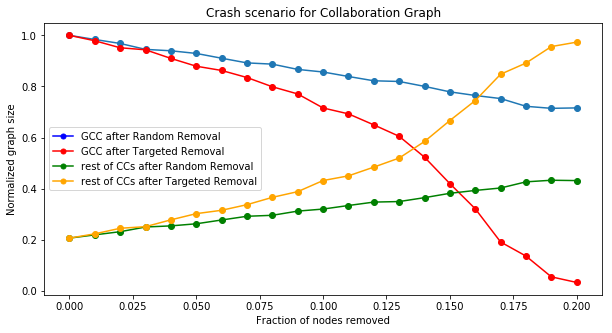

In [8]:
x_axis =[]
for percent in range(0,21):
    x_axis.append(percent/100)
    
plt.figure(figsize=(10,5))
plt.plot(x_axis,GCC_size_rand,marker = 'o')
plt.plot(x_axis,GCC_size_target,marker='o',color='r')
plt.plot(x_axis,rCC_size_rand,marker='o',color='g')
plt.plot(x_axis,rCC_size_target,marker='o', color='orange')
plt.xlabel("Fraction of nodes removed")
plt.ylabel("Normalized graph size")
plt.title("Crash scenario for Collaboration Graph")
#plt.yticks(np.arange(1000, 15000, 1000.0))
blue_line = mlines.Line2D([], [], color='blue',
                          markersize=5,marker='o',label='GCC after Random Removal')
red_line = mlines.Line2D([], [], color='red',
                          markersize=5,marker='o', label='GCC after Targeted Removal')

green_line = mlines.Line2D([], [], color='green',
                          markersize=5,marker='o',label='rest of CCs after Random Removal')
orange_line = mlines.Line2D([], [], color='orange',
                          markersize=5,marker='o', label='rest of CCs after Targeted Removal')

plt.legend(handles=[blue_line,red_line,green_line,orange_line])
plt.show()


### Observation

As expected, the targeted removal of nodes has greater effects on the structure of the GCC than the Random Removal. This really shows that the GCC represents a key aspect of collaboration in the structure of the overall graph.